In [21]:
import yaml
import os
import numpy as np

from roadvision3d.src.engine.dataloader import build_dataloader
from roadvision3d.src.datasets.rope3d import Rope3D

from roadvision3d.visualization import Visualizer_dataloader

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load config and build dataloader

In [22]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_Rope3d_150e.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
dataset = Rope3D(split='train', cfg=cfg['dataset'])

Resolution init: [1920 1088]


In [23]:
print(dataset.idx_list)

item = 1395

print(dataset.idx_list[item])

['145418_fa2sd4a13W152AIR_420_1626246966_1626246983_18_obstacle', '1901_fa2sd4adatasetf328h9k14camera151_420_1629886829_1629887126_257_obstacle', '1784_fa2sd4adatasetWest152_420_1621245269_1621245419_37_obstacle', '1679_fa2sd4adatasetNorth151_420_1616056928_1616057233_186_obstacle', '145044_fa2sd4a06W152AIR_420_1626155724_1626155908_293_obstacle', '61831_fa2sd4a2West152_420_1625824638_1625825007_167_obstacle', '1632_fa2sd4a11North151_420_1613724070_1613731267_183_obstacle', '67980_fa2sd4adatasetfa2sd4a09151_420_1626164333_1626164784_106_obstacle', '1679_fa2sd4adatasetNorth151_420_1616052649_1616052953_233_obstacle', '1679_fa2sd4adatasetNorth151_420_1616056315_1616056622_32_obstacle', '1679_fa2sd4adatasetNorth151_420_1616055703_1616056008_215_obstacle', '62014_fa2sd4adatasetNorth151_420_1625825029_1625825278_102_obstacle', '62512_fa2sd4a10East154_420_1625822987_1625823739_244_obstacle', '1784_fa2sd4adatasetWest152_420_1621245723_1621245873_266_obstacle', '1901_fa2sd4adatasetsj8fas23152_

In [24]:
inputs, calib, coord_range, targets, info = dataset.__getitem__(item)
print(inputs.shape)
print(targets.keys())

(3, 1088, 1920)
dict_keys(['depth', 'size_2d', 'heatmap', 'offset_2d', 'indices', 'size_3d', 'offset_3d', 'heading_bin', 'heading_res', 'cls_ids', 'mask_2d', 'vis_depth', 'rotation_y', 'position'])


In [25]:
valid_size_2d = targets['size_2d'][targets['mask_2d']==1]

print(targets['cls_ids'])
print(valid_size_2d)
print(targets['mask_2d'].shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[36.86868  25.322151]
 [27.358253 22.570755]
 [61.75615  69.2336  ]
 [74.2092   57.408493]
 [60.15753  61.900726]
 [20.419876 20.82875 ]
 [22.522034 18.533081]
 [14.081558 12.783878]
 [24.836975 19.100441]
 [ 4.173401 12.072929]
 [30.940788 28.766579]
 [18.301788 17.89405 ]
 [32.32762  21.743149]]
(100,)


In [26]:
visualizer = Visualizer_dataloader(calib=calib, pitch=0.228, cfg=cfg['dataset'])

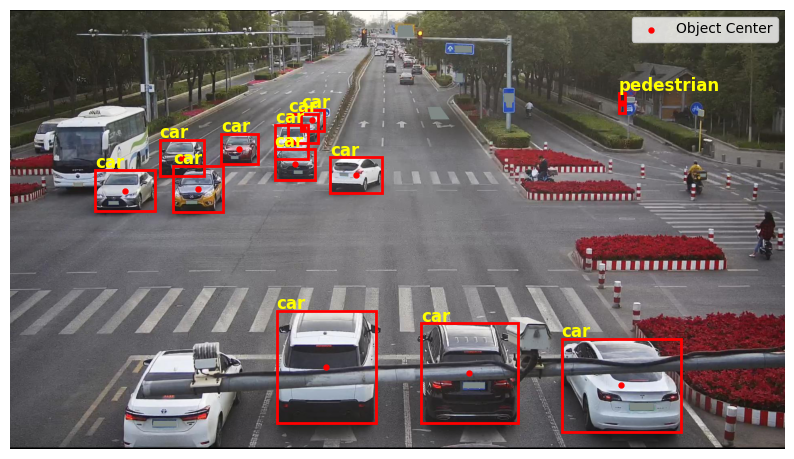

In [27]:
visualizer.draw_2d_bboxes(inputs, targets)

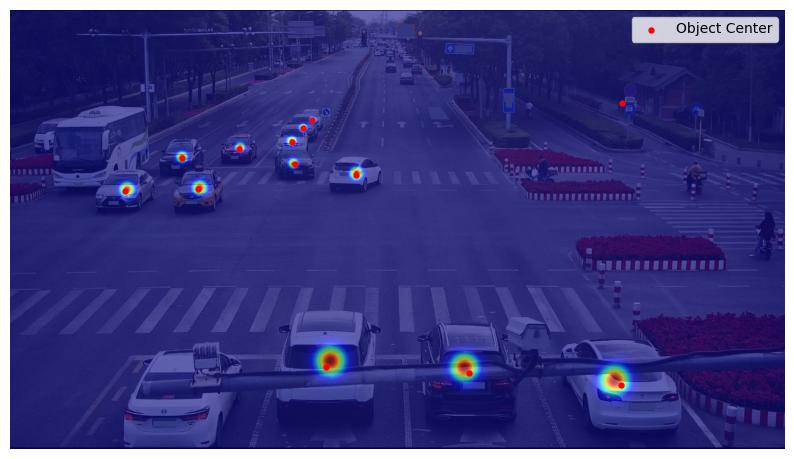

In [28]:
visualizer.draw_heatmaps(inputs, targets)

Object ID: 0
  Depth: 49.61 meters
  3D Size (width, height, length): 1.14, 1.41, 4.43
  Rotation Y (Yaw): 1.59 radians
  Reconstructed Rotation Y: 1.84 radians
  Heading Bin: 4, Heading Residual: -0.26
------------------------------------------------------------
Object ID: 1
  Depth: 61.58 meters
  3D Size (width, height, length): 1.44, 1.44, 4.41
  Rotation Y (Yaw): 1.58 radians
  Reconstructed Rotation Y: 1.79 radians
  Heading Bin: 3, Heading Residual: 0.22
------------------------------------------------------------
Object ID: 2
  Depth: 23.78 meters
  3D Size (width, height, length): 1.07, 1.87, 4.29
  Rotation Y (Yaw): -1.59 radians
  Reconstructed Rotation Y: 4.77 radians
  Heading Bin: 9, Heading Residual: 0.06
------------------------------------------------------------
Object ID: 3
  Depth: 23.55 meters
  3D Size (width, height, length): 0.55, 1.61, 4.39
  Rotation Y (Yaw): 4.69 radians
  Reconstructed Rotation Y: 4.51 radians
  Heading Bin: 9, Heading Residual: -0.21
------

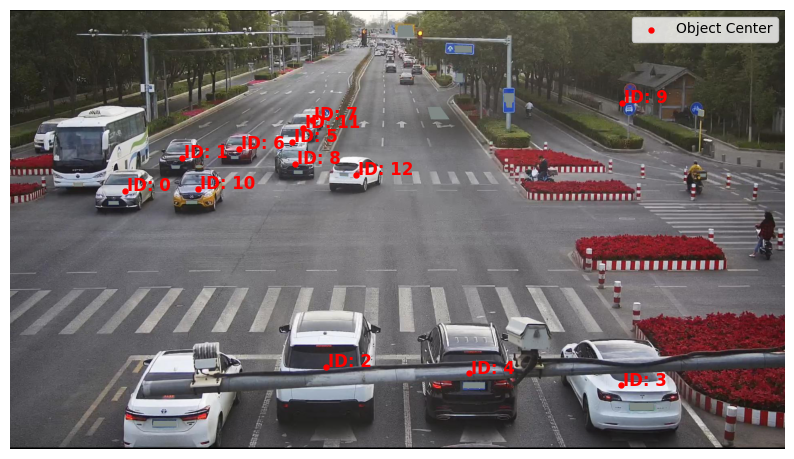

In [29]:
visualizer.display_centers_dimensions_depth(inputs, targets)

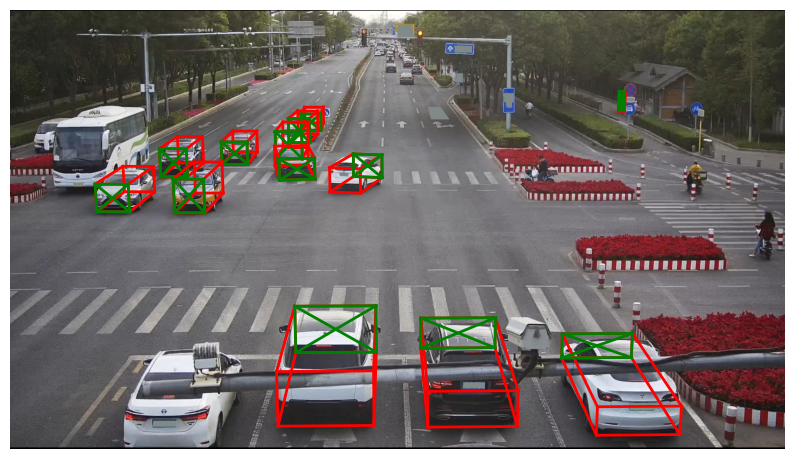

In [30]:
visualizer.draw_3d_bboxes(inputs, targets)
